<a href="https://colab.research.google.com/github/brahma2024/Deep-Implicit-Layers/blob/develop/1_DIL_Implementing_a_fixed_point_iteration_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Implicit Layer Tutorial

- **Implementing a fixed point iteration layer**

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
class TanhFixedPointLayer(nn.Module):
  def __init__(self, out_features, tolerance = 1e-4, max_iters = 50):
    super().__init__()
    self.linear = nn.Linear(out_features, out_features, bias=False)
    self.tolerance = tolerance
    self.max_iters = max_iters

  def forward(self, x):
    # forward method builds the computation graph

    # initialize output z to be zero
    z = torch.zeros_like(x)
    self.iterations = 0
    errs_stepwise = []

    # iterate until convergence
    while self.iterations < self.max_iters:
      z_next = torch.tanh(self.linear(z) + x)
      self.err = torch.norm(z - z_next) # using default Frobenius norm (default, same as L2 norm for matrices)
      # The norm is a measure of the magnitude of a tensor, and there are different types of norms,
      # such as L1 norm (Manhattan distance), L2 norm (Euclidean distance), and others
      errs_stepwise.append(self.err)

      z = z_next
      self.iterations += 1

      if self.iterations % 5 == 0:
        print(f"self.iterations/max_ters: {self.iterations:d}/{self.max_iters:d} | err = {self.err:.7f}")

      if self.err < self.tolerance:
        break

    return z, errs_stepwise

In [6]:
# run the above layer on a random output, to see that in reaches a fixed point
layer = TanhFixedPointLayer(50)
X = torch.randn(10, 50)
print(X.shape)
Z, errs = layer(X)
print(f'Terminated after {layer.iterations} iterations with error {layer.err}')

torch.Size([10, 50])
self.iterations/max_ters: 5/50 | err = 0.3062996
self.iterations/max_ters: 10/50 | err = 0.0033542
Terminated after 14 iterations with error 9.445871546631679e-05


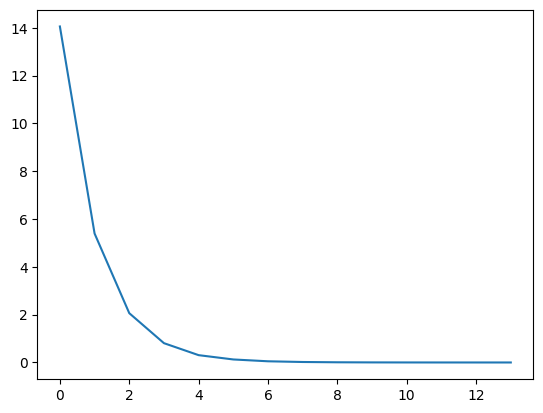

In [7]:
plt.plot([err.detach().numpy() for err in errs])

# Simple model trained on the MNIST dataset,
- using a single fixed point layer
- with an additional linear input layer before the fixed point layer, and
- linear layer after the fixed point layer

# Objective:
- the network at least trains with this layer